In [1]:
#The goal of this project is to find out the active parts of the Covid sequence 
#that we will use in developing the vaccine

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # Spliting Data
import matplotlib.pyplot as plt # for plotting 
from IPython.display import Image
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings("ignore")



# Read Files 

In [2]:
Bcell = pd.read_csv("input_bcell.csv")
Sars  = pd.read_csv("input_sars.csv") 
Covid = pd.read_csv("input_covid.csv")
Bcell.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [125]:
Sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


In [126]:
Covid.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603
2,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,3,7,ILPSP,1.106,0.592,1.108,-1.30,6.03595,0.10929,-0.138642,31.377603
3,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,4,8,LPSPG,1.324,0.836,1.053,1.44,6.03595,0.10929,-0.138642,31.377603
4,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,5,9,PSPGM,1.326,1.004,0.968,2.44,6.03595,0.10929,-0.138642,31.377603


## add Sars dataset to Bcell dataset 
#### Bcell know Sars  if Covid know Sars then Bcell know Covid 

In [3]:
Bcell_Sars = pd.concat([Bcell,Sars],axis=0,ignore_index=True)
Bcell_Sars.shape

(14907, 14)

In [4]:
B=Bcell_Sars.duplicated().sum()
C=Covid.duplicated().sum()
print("B-cell_Sars",B," covid",C)

B-cell_Sars 11  covid 0


In [5]:
Bcell_Sars=Bcell_Sars.drop_duplicates()
Bcell_Sars.duplicated().sum()

0

In [131]:
Bcell_Sars.isna().sum(),Covid.isna().sum()

(parent_protein_id      0
 protein_seq            0
 start_position         0
 end_position           0
 peptide_seq            0
 chou_fasman            0
 emini                  0
 kolaskar_tongaonkar    0
 parker                 0
 isoelectric_point      0
 aromaticity            0
 hydrophobicity         0
 stability              0
 target                 0
 dtype: int64,
 parent_protein_id      0
 protein_seq            0
 start_position         0
 end_position           0
 peptide_seq            0
 chou_fasman            0
 emini                  0
 kolaskar_tongaonkar    0
 parker                 0
 isoelectric_point      0
 aromaticity            0
 hydrophobicity         0
 stability              0
 dtype: int64)

In [132]:
Bcell_Sars.describe()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
count,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000,14896.000000
mean,308.773362,319.436292,0.994906,1.074277,1.021807,1.749920,7.016036,0.077128,-0.394228,43.343509,0.270677
std,358.462133,358.670345,0.123667,1.736873,0.053430,1.955039,1.875898,0.026377,0.392888,16.505895,0.444324
min,1.000000,6.000000,0.534000,0.000000,0.838000,-9.029000,3.686096,0.000000,-1.971171,5.448936,0.000000
25%,86.000000,96.000000,0.913000,0.244000,0.987000,0.600000,5.569763,0.062500,-0.600131,31.725753,0.000000
50%,197.000000,208.000000,0.991000,0.551000,1.021000,1.775000,6.447815,0.075949,-0.318259,41.984246,0.000000
75%,399.250000,411.000000,1.073000,1.207000,1.055000,2.962000,8.676575,0.093458,-0.189591,49.101172,1.000000
max,3079.000000,3086.000000,1.546000,40.605000,1.255000,9.120000,12.232727,0.182254,1.267089,137.046667,1.000000


# use peptide seq in prediction is hard so we can replace it by it's length
## use start and end position of piptide to compute its length

In [6]:
# new column is created with the label “length” 
#which is the length between the start_position and end_position.
for L in [Bcell_Sars,Covid]:
    L['length'] = L['end_position'] - L['start_position'] + 1

# ploting the correlation between columns

In [134]:
# from sklearn.preprocessing import Normalizer
# scaler = Normalizer(copy=True, norm='l2')
# Bcell_Sars[['emini','stability','length']] = scaler.fit_transform(Bcell_Sars[['emini','stability','length']])

corr = Bcell_Sars.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target,length
start_position,1.000,1.000,0.043,0.004,-0.024,-0.017,-0.255,0.294,0.018,-0.111,-0.070,0.030
end_position,1.000,1.000,0.043,0.004,-0.024,-0.017,-0.256,0.296,0.019,-0.111,-0.069,0.046
chou_fasman,0.043,0.043,1.000,0.226,-0.445,0.592,0.014,0.007,-0.140,0.114,0.086,0.008
emini,0.004,0.004,0.226,1.000,-0.407,0.425,-0.008,0.042,0.032,-0.013,0.080,0.036
kolaskar_tongaonkar,-0.024,-0.024,-0.445,-0.407,1.000,-0.689,-0.016,0.124,0.301,-0.032,-0.029,0.037
parker,-0.017,-0.017,0.592,0.425,-0.689,1.000,-0.008,-0.186,-0.301,0.083,0.029,-0.005
isoelectric_point,-0.255,-0.256,0.014,-0.008,-0.016,-0.008,1.000,-0.214,-0.211,0.214,-0.127,-0.082
aromaticity,0.294,0.296,0.007,0.042,0.124,-0.186,-0.214,1.000,0.323,-0.256,0.036,0.163
hydrophobicity,0.018,0.019,-0.140,0.032,0.301,-0.301,-0.211,0.323,1.000,-0.409,0.100,0.060
stability,-0.111,-0.111,0.114,-0.013,-0.032,0.083,0.214,-0.256,-0.409,1.000,0.031,-0.026


# Drop and Split Data 
## split data to 30 testing and 70% training


In [7]:
X_Bcell_Sars=Bcell_Sars.drop(['parent_protein_id','protein_seq','start_position',
                              'end_position','peptide_seq','target'],axis=1)
Y_Bcell_Sars=Bcell_Sars.target
x_train,x_test,y_train,y_test= train_test_split(X_Bcell_Sars,Y_Bcell_Sars,test_size=0.20,random_state=None)


In [136]:
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import f_classif 
# FeatureSelection = SelectPercentile(score_func= f_classif,percentile=70) # score_func can = f_classif : mode can = percentile,fpr,fdr,fwe 
# X = FeatureSelection.fit_transform(X_Bcell_Sars, Y_Bcell_Sars)
# P = FeatureSelection.get_support()
# c = list(X_Bcell_Sars.columns)
# for i in range(len(X_Bcell_Sars.columns)):
#     print("{:<20}{:<30}".format(c[i],P[i]))

In [137]:
# X_Bcell_Sars=Bcell_Sars[['chou_fasman','emini','isoelectric_point',
#                               'aromaticity','hydrophobicity','length']]



# Find the minimum and maximum values 

In [138]:
for i in X_Bcell_Sars.columns:
    print("{:<40} {:<40}".format(i+' min',i+' max'))
    print("{:<40} {:<40}".format(round(X_Bcell_Sars[i].min(),4),round(X_Bcell_Sars[i].max(),4)))


chou_fasman min                          chou_fasman max                         
0.534                                    1.546                                   
emini min                                emini max                               
0.0                                      40.605                                  
kolaskar_tongaonkar min                  kolaskar_tongaonkar max                 
0.838                                    1.255                                   
parker min                               parker max                              
-9.029                                   9.12                                    
isoelectric_point min                    isoelectric_point max                   
3.6861                                   12.2327                                 
aromaticity min                          aromaticity max                         
0.0                                      0.1823                                  
hydrophobicity m

# the aim of this graph is showing the values and its count
#### Find the minimum and maximum values to determine the range of values to make a decision if Decrease the range of values using a maximal reduction or not

array([[<AxesSubplot:title={'center':'chou_fasman'}>,
        <AxesSubplot:title={'center':'emini'}>,
        <AxesSubplot:title={'center':'kolaskar_tongaonkar'}>],
       [<AxesSubplot:title={'center':'parker'}>,
        <AxesSubplot:title={'center':'isoelectric_point'}>,
        <AxesSubplot:title={'center':'aromaticity'}>],
       [<AxesSubplot:title={'center':'hydrophobicity'}>,
        <AxesSubplot:title={'center':'stability'}>,
        <AxesSubplot:title={'center':'length'}>]], dtype=object)

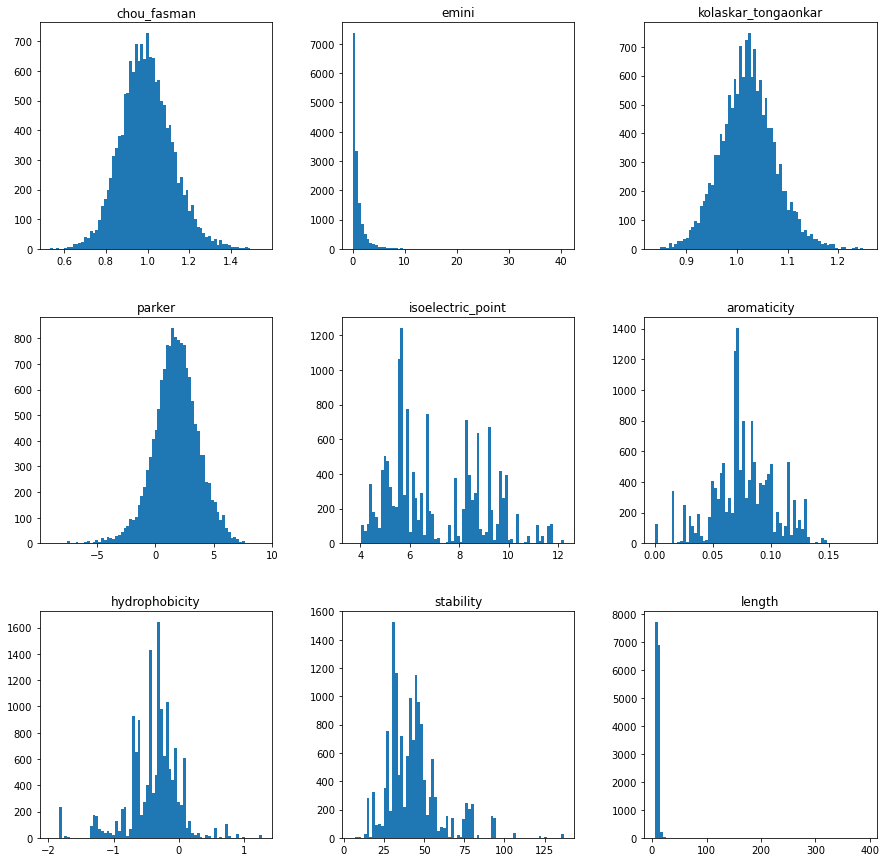

In [139]:
X_Bcell_Sars.hist(grid=False, figsize=(15, 15), bins=75)

In [140]:
# c = X_Bcell_Sars.shape[0]
# for i in range(c):
#     if X_Bcell_Sars['stability'][i]>80:
#         X_Bcell_Sars['stability'][i]=80
# X_Bcell_Sars.stability.hist(grid=False, figsize=(4, 4), bins=25)

# our data is binary classificition [0,1]
## so we applyed he most machine learning classification 
### 1- Logistic Regression
### 2- Super vactor macine 
### 3- Random Forest
### 4-Gradient Boosting Classifier

# Logistic Regression model 73%

In [19]:
from sklearn.linear_model import LogisticRegression # classification algorithm
LogisticRegressionModel = LogisticRegression(solver='liblinear',C=1.0,random_state=None)
LogisticRegressionModel.fit(x_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test))
print('----------------------------------------------------')
ypredLRM = LogisticRegressionModel.predict(x_test)
ypredLRM=pd.DataFrame(ypredLRM)


LogisticRegressionModel Train Score is :  0.7311178247734139
LogisticRegressionModel Test Score is :  0.7375838926174496
----------------------------------------------------


## Model report

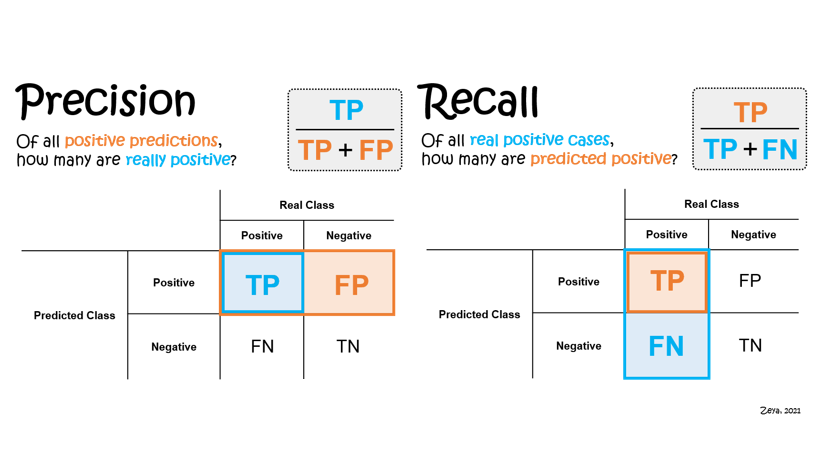

In [174]:
Image("./images/0_GR1VO6PTxACgd6ub.png")

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, ypredLRM)
R=recall_score(y_test, ypredLRM, average='binary')
P=precision_score(y_test, ypredLRM, average='binary')
print(confusion_matrix1)
print("\nrecall_score for y_ypredLRM\t",R,'\nprecision_score for y_ypredLRM\t',P)


[[2158   34]
 [ 748   40]]

recall_score for y_ypredLRM	 0.050761421319796954 
precision_score for y_ypredLRM	 0.5405405405405406


In [21]:
ypredLRM.value_counts(),y_test.value_counts()

(0    2906
 1      74
 dtype: int64,
 0    2192
 1     788
 Name: target, dtype: int64)

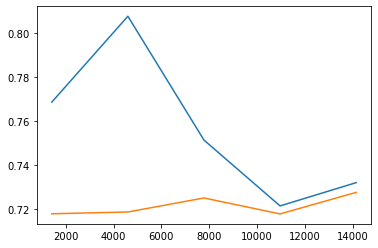

In [226]:
estimator = LogisticRegression()

train_sizes, train_scores, test_scores= learning_curve(estimator, X_Bcell_Sars,Y_Bcell_Sars, cv=20)
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))


# SVM -> SVC model 72

In [14]:
from sklearn.svm import SVC
SVCModel = SVC(kernel= 'rbf')
SVCModel.fit(x_train, y_train)

#Calculating Details
print('SVCModel Train Score is : ' , SVCModel.score(x_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(x_test, y_test))
print('----------------------------------------------------')
ypredSVC = SVCModel.predict(x_test)
ypredSVC=pd.DataFrame(ypredSVC)


SVCModel Train Score is :  0.7285162806310842
SVCModel Test Score is :  0.7359060402684564
----------------------------------------------------


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 =confusion_matrix(y_test, ypredSVC)
R=recall_score(y_test, ypredSVC, average='binary')
P=precision_score(y_test, ypredSVC, average='binary')
print(confusion_matrix2)
print("\nrecall_score for ypredSVC\t",R,'\nprecision_score for ypredSVC\t',P)


[[2187    5]
 [ 782    6]]

recall_score for ypredSVC	 0.007614213197969543 
precision_score for ypredSVC	 0.5454545454545454


In [17]:
ypredSVC.value_counts(),y_test.value_counts()

(0    2969
 1      11
 dtype: int64,
 0    2192
 1     788
 Name: target, dtype: int64)

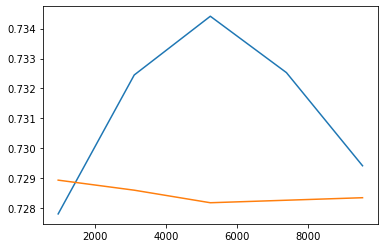

In [233]:
estimator1 = SVC(kernel= 'rbf')

train_sizes, train_scores, test_scores =learning_curve(estimator1, x_train, y_train)


plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))

# Random Forest Classifier 87%

In [22]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(criterion ='entropy',n_estimators=1010,random_state=None,n_jobs=4)                     
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('----------------------------------------------------')
ypredRFC = RandomForestClassifierModel.predict(x_test)
ypredRFC=pd.DataFrame(ypredRFC)



RandomForestClassifierModel Train Score is :  0.9986572675394427
RandomForestClassifierModel Test Score is :  0.8741610738255033
----------------------------------------------------


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix3 =confusion_matrix(y_test, ypredRFC)
R=recall_score(y_test, ypredRFC, average='binary')
P=precision_score(y_test, ypredRFC, average='binary')
print(confusion_matrix3)
print("\nrecall_score for ypredSVC\t",R,'\nprecision_score for ypredSVC\t',P)


[[2053  139]
 [ 236  552]]

recall_score for ypredSVC	 0.700507614213198 
precision_score for ypredSVC	 0.7988422575976846


In [24]:
ypredRFC.value_counts(),y_test.value_counts()

(0    2289
 1     691
 dtype: int64,
 0    2192
 1     788
 Name: target, dtype: int64)

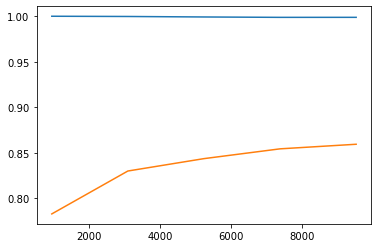

In [232]:
estimator2 =  RandomForestClassifier(criterion ='entropy',n_estimators=1010,random_state=None,n_jobs=4) 
train_sizes, train_scores, test_scores= learning_curve(estimator2, x_train, y_train)
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))

# Gradient Boosting Classifier 85%


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

GBCModel = GradientBoostingClassifier(n_estimators=1000) 
GBCModel.fit(x_train, y_train)

#Calculating Details
print('GBCModel Train Score is : ' , GBCModel.score(x_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(x_test, y_test))
print('----------------------------------------------------')
ypredGBC = GBCModel.predict(x_test)
ypredGBC=pd.DataFrame(ypredGBC)



GBCModel Train Score is :  0.9118831822759316
GBCModel Test Score is :  0.8536912751677852
----------------------------------------------------


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix4 =confusion_matrix(y_test, ypredGBC)
R=recall_score(y_test, ypredGBC, average='binary')
P=precision_score(y_test, ypredGBC, average='binary')
print(confusion_matrix4)
print("\nrecall_score for ypredSVC\t",R,'\nprecision_score for ypredSVC\t',P)

[[2033  159]
 [ 277  511]]

recall_score for ypredSVC	 0.6484771573604061 
precision_score for ypredSVC	 0.7626865671641792


In [27]:
ypredGBC.value_counts(),y_test.value_counts()

(0    2310
 1     670
 dtype: int64,
 0    2192
 1     788
 Name: target, dtype: int64)

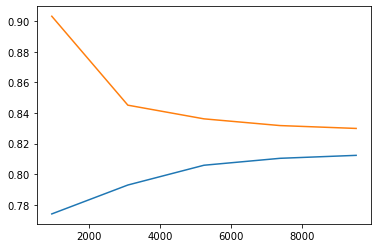

In [234]:
estimator3 =  GradientBoostingClassifier() 
train_sizes, train_scores, test_scores= learning_curve(estimator3,x_train, y_train)
plt.plot(train_sizes,np.mean(test_scores,axis=1))
plt.plot(train_sizes,np.mean(train_scores,axis=1))

## after fiting Bcells data know we preprocessing on Covid file 
## then we input it as inputs in Randome Forest Model 

In [15]:
X_Covid=Covid.drop(['parent_protein_id','protein_seq','start_position','end_position','peptide_seq'],axis=1)
j= RandomForestClassifierModel.predict(X_Covid)
j[:400]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# make a new fike with attribut Target such as Bcell file  formall 

In [16]:
Covid['Target']= pd.DataFrame(j)

In [17]:
C = len(Covid)
l=[]
for c in range(C):
    if Covid.Target[c]==1:
        Dic={"peptide_seq":Covid.peptide_seq[c],
            "Target":Covid.Target[c]}
        l.append(Dic)
pd.DataFrame(l)

,peptide_seq,Target
0,MGILP,1
1,GILPS,1
2,ILPSP,1
3,LPSPG,1
4,PSPGM,1
...,...,...
14320,YVRKDGEWVLLSTFLGHHHH,1
14321,VRKDGEWVLLSTFLGHHHHH,1
14322,RKDGEWVLLSTFLGHHHHHH,1
14323,KDGEWVLLSTFLGHHHHHHH,1


In [18]:
print(Covid.shape)

Covid.Target.value_counts()


(20312, 15)


1    14325
0     5987
Name: Target, dtype: int64

# Now its time for apply different Neural Network types
## ANN Sklearn
## ANN Krase
## RNN
## CNN

## ANN sklearn 84.3%

In [28]:
from sklearn.neural_network import MLPClassifier
MLPClassifierModel = MLPClassifier(activation='tanh',solver='adam', learning_rate='constant',early_stopping= False,
                                   alpha=0.0001,learning_rate_init=0.0001 ,hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),random_state=None,max_iter=800)
MLPClassifierModel.fit(x_train, y_train)


MLPClassifier(activation='tanh',
              hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100),
              learning_rate_init=0.0001, max_iter=800)

In [29]:
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(x_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(x_test, y_test))
print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)
y_pred = MLPClassifierModel.predict(x_test)
y_pred=pd.DataFrame(y_pred)

print(list(y_test[:10]))
print('Predicted Value for MLPClassifierModel is : ' , y_pred[:10])


MLPClassifierModel Train Score is :  0.8758811681772407
MLPClassifierModel Test Score is :  0.8469798657718121
MLPClassifierModel loss is :  0.29085117619648054
MLPClassifierModel No. of iterations is :  405
MLPClassifierModel No. of layers is :  11
MLPClassifierModel last activation is :  logistic
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Predicted Value for MLPClassifierModel is :     0
0  0
1  0
2  0
3  0
4  0
5  0
6  0
7  0
8  0
9  0


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix4 =confusion_matrix(y_test, y_pred)
R=recall_score(y_test, y_pred, average='binary')
P=precision_score(y_test, y_pred, average='binary')
print(confusion_matrix4)
print("\nrecall_score for ypredSVC\t",R,'\nprecision_score for ypredSVC\t',P)


[[2016  176]
 [ 280  508]]

recall_score for ypredSVC	 0.6446700507614214 
precision_score for ypredSVC	 0.7426900584795322


In [32]:
y_pred.value_counts(),y_test.value_counts()

(0    2296
 1     684
 dtype: int64,
 0    2192
 1     788
 Name: target, dtype: int64)

[learning_curve] Training set sizes: [ 953 3097 5242 7387 9532]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 31.2min finished


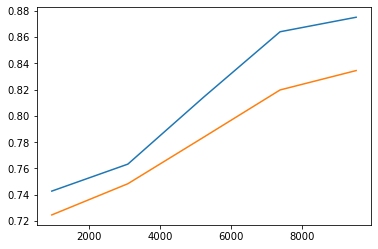

In [15]:
estimator4 =   MLPClassifier(activation='tanh',solver='adam', learning_rate='constant',early_stopping= False,
                                   alpha=0.0001,learning_rate_init=0.0001 ,hidden_layer_sizes=(100,100,100,100,100,100,100,100,100),random_state=None,max_iter=800)

train_sizes, train_scores, test_scores= learning_curve(estimator4,x_train, y_train,verbose=1,n_jobs=4)
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))


# ANN Keras  84.3

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [62]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation =tf.keras.activations.relu),
    tf.keras.layers.Dense(100,activation =tf.keras.activations.relu),
    tf.keras.layers.Dense(100,activation =tf.keras.activations.relu),
    tf.keras.layers.Dense(100,activation =tf.keras.activations.relu),
    tf.keras.layers.Dense(100,activation =tf.keras.activations.relu),
    tf.keras.layers.Dense(100,activation =tf.keras.activations.relu),
    tf.keras.layers.Dense(100,activation =tf.keras.activations.relu),
    tf.keras.layers.Dense(100,activation =tf.keras.activations.relu),
    tf.keras.layers.Dense(100,activation =tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation =tf.keras.activations.sigmoid)

  
])

In [63]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [64]:
history = model.fit(x_train,y_train,epochs=100,validation_data=(x_test, y_test))


Epoch 1/100
373/373 [==============================] - 18s 22ms/step - loss: 0.5847 - accuracy: 0.7282 - val_loss: 0.5626 - val_accuracy: 0.7359
Epoch 2/100
373/373 [==============================] - 8s 20ms/step - loss: 0.5720 - accuracy: 0.7280 - val_loss: 0.5592 - val_accuracy: 0.7359
Epoch 3/100
373/373 [==============================] - 3s 9ms/step - loss: 0.5665 - accuracy: 0.7285 - val_loss: 0.5732 - val_accuracy: 0.7369
Epoch 4/100
373/373 [==============================] - 4s 11ms/step - loss: 0.5656 - accuracy: 0.7278 - val_loss: 0.5668 - val_accuracy: 0.7372
Epoch 5/100
373/373 [==============================] - 4s 10ms/step - loss: 0.5595 - accuracy: 0.7287 - val_loss: 0.5582 - val_accuracy: 0.7376
Epoch 6/100
373/373 [==============================] - 4s 10ms/step - loss: 0.5562 - accuracy: 0.7288 - val_loss: 0.5486 - val_accuracy: 0.7416
Epoch 7/100
373/373 [==============================] - 4s 10ms/step - loss: 0.5545 - accuracy: 0.7263 - val_loss: 0.5429 - val_accuracy:

373/373 [==============================] - 3s 9ms/step - loss: 0.3574 - accuracy: 0.8415 - val_loss: 0.3755 - val_accuracy: 0.8356
Epoch 58/100
373/373 [==============================] - 4s 11ms/step - loss: 0.3578 - accuracy: 0.8411 - val_loss: 0.3764 - val_accuracy: 0.8302
Epoch 59/100
373/373 [==============================] - 4s 11ms/step - loss: 0.3557 - accuracy: 0.8421 - val_loss: 0.3771 - val_accuracy: 0.8346
Epoch 60/100
373/373 [==============================] - 4s 10ms/step - loss: 0.3479 - accuracy: 0.8458 - val_loss: 0.3922 - val_accuracy: 0.8319
Epoch 61/100
373/373 [==============================] - 4s 11ms/step - loss: 0.3508 - accuracy: 0.8435 - val_loss: 0.4073 - val_accuracy: 0.8258
Epoch 62/100
373/373 [==============================] - 4s 12ms/step - loss: 0.3476 - accuracy: 0.8452 - val_loss: 0.3918 - val_accuracy: 0.8282
Epoch 63/100
373/373 [==============================] - 4s 11ms/step - loss: 0.3494 - accuracy: 0.8456 - val_loss: 0.4192 - val_accuracy: 0.8208

In [65]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

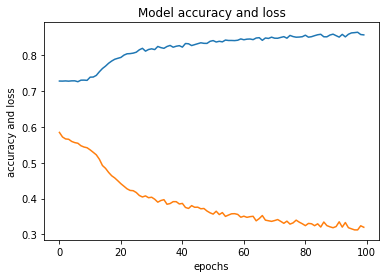

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epochs')
plt.show()

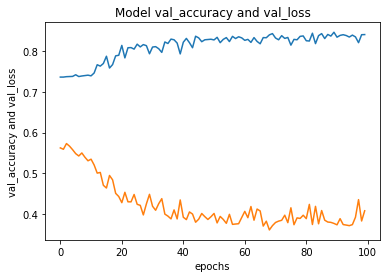

In [67]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])

plt.title('Model val_accuracy and val_loss')
plt.ylabel('val_accuracy and val_loss')
plt.xlabel('epochs')
plt.show()

In [59]:
model.evaluate(x_train,y_train)

373/373 [==============================] - 4s 3ms/step - loss: 0.2402 - accuracy: 0.8979


### sigmoid function output is in range 0->1
### so we made the cells that have value less than 0.5 to 0
### cells tha have value More than or equal 0.5 to 1

## compute the accuracy on test data 

In [68]:
y_predSec= model.predict(x_test)
y_predSec=pd.DataFrame(y_predSec)
l=len(y_predSec)
for i in range(l):
    if y_predSec[0][i]< 0.5:
        y_predSec[0][i]= 0
    else:
        y_predSec[0][i]=1


In [69]:
from sklearn.metrics import accuracy_score
Acccore = accuracy_score(y_test, y_predSec[0], normalize=True)
Acccore


0.8399328859060403

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix5 =confusion_matrix(y_test, y_predSec)
R=recall_score(y_test, y_predSec, average="binary")
P=precision_score(y_test, y_predSec, average='binary')
print(confusion_matrix5)
print("\nrecall_score for ypredSVC\t",R,'\nprecision_score for ypredSVC\t',P)

[[2013  179]
 [ 298  490]]

recall_score for ypredSVC	 0.6218274111675127 
precision_score for ypredSVC	 0.7324364723467862


In [78]:
m= np.array(x_train)
y = np.array(y_train)
m = m.reshape(-1, 1, 9)
y = y.reshape(-1, 1,)
VX= np.array(x_test)
VY= np.array(y_test)
VX = VX.reshape(-1, 1, 9)
VY= VY.reshape(-1, 1,)
model =keras.models.Sequential()

model.add(layers.LSTM(100, input_shape=(1, 9), return_sequences=True))
model.add(layers.Dropout(0.))
model.add(layers.LSTM(100, input_shape=(1, 9), return_sequences=True))
model.add(layers.Dropout(0.1))

model.add(layers.LSTM(100, input_shape=(1, 9), return_sequences=True))
model.add(layers.Dropout(0.1))

model.add(layers.LSTM(100, input_shape=(1, 9), return_sequences=True))
model.add(layers.Dropout(0.1))

model.add(layers.LSTM(100, input_shape=(1, 9), return_sequences=True))
model.add(layers.Dropout(0.1))


model.add(layers.Dense(1,activation='sigmoid'))

loss = keras.losses.BinaryCrossentropy(),
optim = keras.optimizers.Adam()
metrics = ["accuracy"]

model.compile(loss=loss, optimizer=optim, metrics=metrics)
hist1 = model.fit(m,y,epochs=110,validation_data=(VX, VY))

Epoch 1/110
373/373 [==============================] - 190s 59ms/step - loss: 0.5789 - accuracy: 0.7278 - val_loss: 0.5619 - val_accuracy: 0.7359
Epoch 2/110
373/373 [==============================] - 18s 48ms/step - loss: 0.5629 - accuracy: 0.7286 - val_loss: 0.5743 - val_accuracy: 0.7376
Epoch 3/110
373/373 [==============================] - 17s 46ms/step - loss: 0.5585 - accuracy: 0.7281 - val_loss: 0.5545 - val_accuracy: 0.7403
Epoch 4/110
373/373 [==============================] - 16s 44ms/step - loss: 0.5578 - accuracy: 0.7304 - val_loss: 0.5614 - val_accuracy: 0.7379
Epoch 5/110
373/373 [==============================] - 18s 47ms/step - loss: 0.5517 - accuracy: 0.7341 - val_loss: 0.5514 - val_accuracy: 0.7413
Epoch 6/110
373/373 [==============================] - 17s 46ms/step - loss: 0.5498 - accuracy: 0.7357 - val_loss: 0.5437 - val_accuracy: 0.7436
Epoch 7/110
373/373 [==============================] - 16s 44ms/step - loss: 0.5445 - accuracy: 0.7388 - val_loss: 0.5488 - val_a

373/373 [==============================] - 16s 44ms/step - loss: 0.4038 - accuracy: 0.8153 - val_loss: 0.4056 - val_accuracy: 0.8054
Epoch 58/110
373/373 [==============================] - 16s 44ms/step - loss: 0.4089 - accuracy: 0.8090 - val_loss: 0.4066 - val_accuracy: 0.8131
Epoch 59/110
373/373 [==============================] - 15s 41ms/step - loss: 0.3957 - accuracy: 0.8183 - val_loss: 0.4115 - val_accuracy: 0.8081
Epoch 60/110
373/373 [==============================] - 15s 40ms/step - loss: 0.3939 - accuracy: 0.8204 - val_loss: 0.3987 - val_accuracy: 0.8144
Epoch 61/110
373/373 [==============================] - 16s 43ms/step - loss: 0.3978 - accuracy: 0.8158 - val_loss: 0.4037 - val_accuracy: 0.8198
Epoch 62/110
373/373 [==============================] - 17s 45ms/step - loss: 0.3960 - accuracy: 0.8192 - val_loss: 0.3956 - val_accuracy: 0.8161
Epoch 63/110
373/373 [==============================] - 17s 44ms/step - loss: 0.3850 - accuracy: 0.8244 - val_loss: 0.4045 - val_accuracy

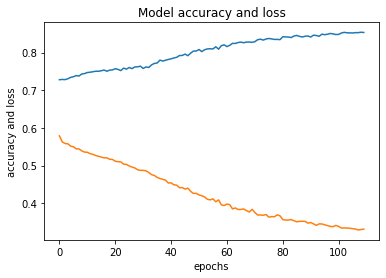

In [82]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['loss'])
plt.title('Model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epochs')
plt.show()

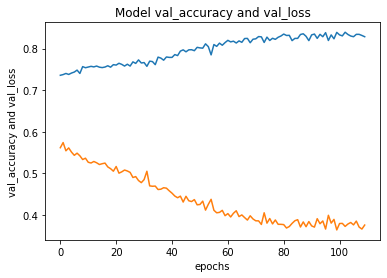

In [83]:
plt.plot(hist1.history['val_accuracy'])
plt.plot(hist1.history['val_loss'])

plt.title('Model val_accuracy and val_loss')
plt.ylabel('val_accuracy and val_loss')
plt.xlabel('epochs')
plt.show()

In [84]:
model.evaluate(m,y) 

373/373 [==============================] - 7s 10ms/step - loss: 0.3162 - accuracy: 0.8587


[0.31619465351104736, 0.8586773872375488]

In [39]:
m2= np.array(x_test)
l = m2.shape[0]
m2 = m2.reshape(-1, 1, 9)
y_predLSTM=model.predict(m2)
y_predLSTM=y_predLSTM.reshape(l,)
y_predLSTM=pd.DataFrame(y_predLSTM)




In [40]:
y_predLSTM=round(y_predLSTM)


In [43]:
from sklearn.metrics import accuracy_score
Acccore = accuracy_score(y_test, y_predLSTM[0], normalize=True)
Acccore

0.8389261744966443

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix6 =confusion_matrix(y_test, y_predLSTM)
R=recall_score(y_test, y_predLSTM, average='binary')
P=precision_score(y_test, y_predLSTM, average='binary')
print(confusion_matrix6)
print("\nrecall_score for y_predLSTM\t",R,'\nprecision_score for y_predLSTM\t',P)

[[2039  153]
 [ 327  461]]

recall_score for y_predLSTM	 0.5850253807106599 
precision_score for y_predLSTM	 0.750814332247557


In [33]:
# import pickle

In [34]:
# data = {'model':RandomForestClassifierModel}
# with open('saved_steps.pkl','wb') as file:
#     pickle.dump(data, file)

In [36]:
# with open('saved_steps.pkl','rb') as file:
#     data = pickle.load(file)
# RFCM = data['model']

In [1]:
# r = RFCM.predict(X_Bcell_Sars)
# r=pd.DataFrame(r)
# r[:30]